In [1]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load df

In [2]:
df = pd.read_csv('/kaggle/input/customer-satisfaction-in-airline/Invistico_Airline.csv')
df.sample(30).T

,76799,121278,50595,10417,13164,117239,120296,24951,102312,92602,...,121593,19776,73926,19863,119592,101717,117966,28034,23516,90352
satisfaction,dissatisfied,satisfied,dissatisfied,dissatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,...,satisfied,satisfied,dissatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,...,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,47,55,38,58,69,57,30,26,48,54,...,43,28,42,49,58,54,49,26,64,44
Type of Travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Personal Travel,Business travel,Business travel,...,Business travel,Personal Travel,Business travel,Personal Travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel
Class,Business,Business,Eco,Eco,Eco,Business,Business,Eco,Business,Business,...,Business,Eco,Eco,Eco,Business,Business,Business,Eco,Eco,Business
Flight Distance,2782,1118,2023,1515,691,1959,3591,1119,3181,3579,...,3922,2123,1472,452,367,2099,987,2367,1764,1043
Seat comfort,2,4,3,2,3,5,4,4,3,4,...,3,5,2,1,3,4,5,4,5,3
Departure/Arrival time convenient,3,4,0,2,3,5,4,4,3,4,...,3,4,5,1,3,5,5,4,3,3
Food and drink,3,4,2,2,3,5,4,4,3,4,...,3,2,3,1,2,4,5,4,3,3
Gate location,3,4,5,4,3,5,4,4,3,4,...,3,2,5,1,3,4,5,4,3,3


# Check for nan values

In [3]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

# Imput nan values

In [4]:
df['Arrival Delay in Minutes']

0           0.0
1         305.0
2           0.0
3           0.0
4           0.0
          ...  
129875      0.0
129876    172.0
129877    163.0
129878    205.0
129879    186.0
Name: Arrival Delay in Minutes, Length: 129880, dtype: float64

In [5]:
mean = df['Arrival Delay in Minutes'].mean()
mean

15.09112883918849

In [6]:
df['Arrival Delay in Minutes'].replace(np.nan, mean, inplace=True)

In [7]:
df.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# Label Encoder for categorical columns.

In [8]:
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [9]:
le = LabelEncoder()
df['satisfaction'] = le.fit_transform(df['satisfaction'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Class'] = le.fit_transform(df['Class'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])

In [10]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


# Split data & predictions with multiple classifiers.

In [11]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

models = [
    CatBoostClassifier(verbose=False),
    XGBClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=2000)
    
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_name = model.__class__.__name__
    print(f'{model_name} - Precisión: {pre:.2f}')
    print(f'{model_name} - Accuracy: {score:.2f}')
    print(f'{model_name} - Recall: {rec:.2f}')
    print(f'{model_name} - F1 Score: {f1:.2f}')


CatBoostClassifier - Precisión: 0.97
CatBoostClassifier - Accuracy: 0.96
CatBoostClassifier - Recall: 0.95
CatBoostClassifier - F1 Score: 0.96
XGBClassifier - Precisión: 0.97
XGBClassifier - Accuracy: 0.96
XGBClassifier - Recall: 0.95
XGBClassifier - F1 Score: 0.96
GaussianNB - Precisión: 0.82
GaussianNB - Accuracy: 0.81
GaussianNB - Recall: 0.83
GaussianNB - F1 Score: 0.83
RandomForestClassifier - Precisión: 0.97
RandomForestClassifier - Accuracy: 0.96
RandomForestClassifier - Recall: 0.95
RandomForestClassifier - F1 Score: 0.96
KNeighborsClassifier - Precisión: 0.72
KNeighborsClassifier - Accuracy: 0.70
KNeighborsClassifier - Recall: 0.73
KNeighborsClassifier - F1 Score: 0.73
LogisticRegression - Precisión: 0.84
LogisticRegression - Accuracy: 0.82
LogisticRegression - Recall: 0.84
LogisticRegression - F1 Score: 0.84


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


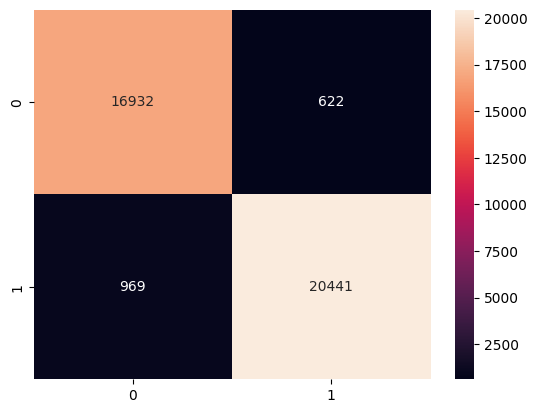

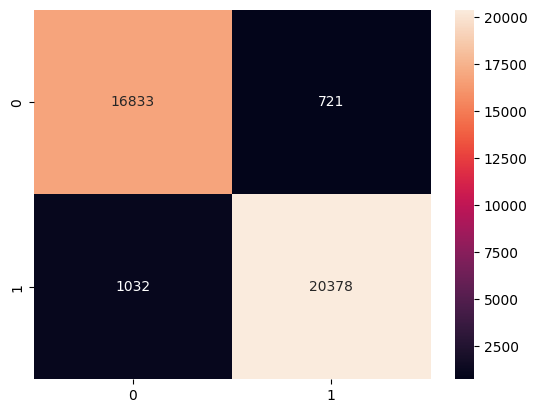

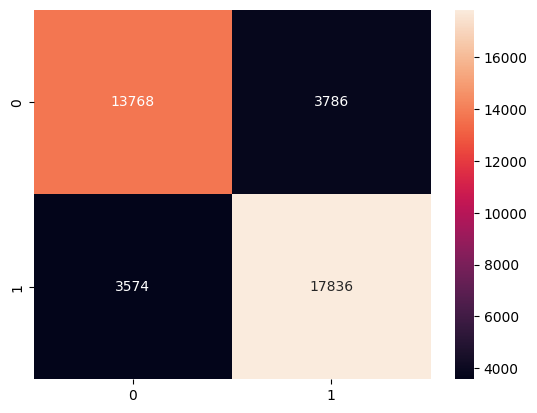

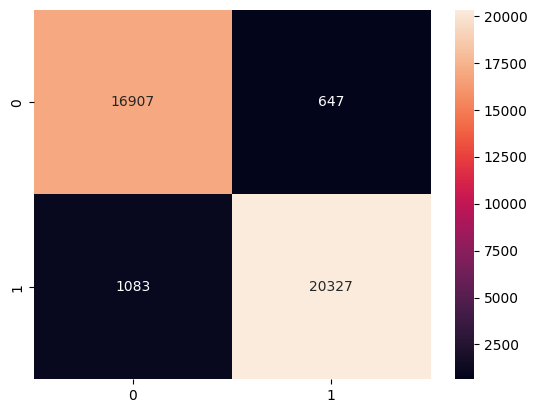

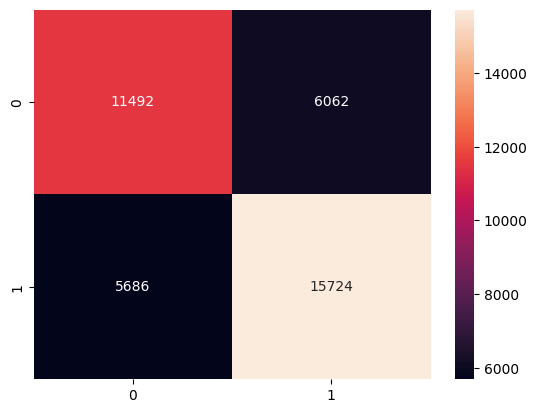

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


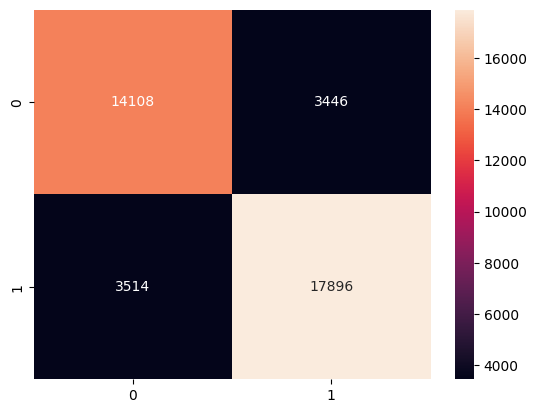

In [12]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    con = confusion_matrix(y_test, y_pred)
    model_name = model.__class__.__name__
    sns.heatmap(con, annot=True, fmt='d')
    plt.show()